# Country racing chart using Google Search Console data

In [ ]:
import calendar
from unicodedata import lookup

import advertools as adv
import adviz
import pandas as pd
import numpy as np
import plotly.express as px
import searchconsole

## Function to make a flag using two country letters

In [ ]:
def flag(letters):
    if letters in [None, '', np.nan]:
        return ''
    l0 = lookup(f'REGIONAL INDICATOR SYMBOL LETTER {letters[0]}')
    l1 = lookup(f'REGIONAL INDICATOR SYMBOL LETTER {letters[1]}')
    return l0 + l1

In [ ]:
flag('br'), flag('jp'), flag('eg'), flag('au')

('🇧🇷', '🇯🇵', '🇪🇬', '🇦🇺')

## Convert 3-letter country codes to 2-letter

In [ ]:
iso3_to_2 = {
    'AFG': 'AF',
    'ALA': 'AX',
    'ALB': 'AL',
    'DZA': 'DZ',
    'ASM': 'AS',
    'AND': 'AD',
    'AGO': 'AO',
    'AIA': 'AI',
    'ATA': 'AQ',
    'ATG': 'AG',
    'ARG': 'AR',
    'ARM': 'AM',
    'ABW': 'AW',
    'AUS': 'AU',
    'AUT': 'AT',
    'AZE': 'AZ',
    'BHS': 'BS',
    'BHR': 'BH',
    'BGD': 'BD',
    'BRB': 'BB',
    'BLR': 'BY',
    'BEL': 'BE',
    'BLZ': 'BZ',
    'BEN': 'BJ',
    'BMU': 'BM',
    'BTN': 'BT',
    'BOL': 'BO',
    'BES': 'BQ',
    'BIH': 'BA',
    'BWA': 'BW',
    'BVT': 'BV',
    'BRA': 'BR',
    'IOT': 'IO',
    'BRN': 'BN',
    'BGR': 'BG',
    'BFA': 'BF',
    'BDI': 'BI',
    'CPV': 'CV',
    'KHM': 'KH',
    'CMR': 'CM',
    'CAN': 'CA',
    'CYM': 'KY',
    'CAF': 'CF',
    'TCD': 'TD',
    'CHL': 'CL',
    'CHN': 'CN',
    'CXR': 'CX',
    'CCK': 'CC',
    'COL': 'CO',
    'COM': 'KM',
    'COD': 'CD',
    'COG': 'CG',
    'COK': 'CK',
    'CRI': 'CR',
    'CIV': 'CI',
    'HRV': 'HR',
    'CUB': 'CU',
    'CUW': 'CW',
    'CYP': 'CY',
    'CZE': 'CZ',
    'DNK': 'DK',
    'DJI': 'DJ',
    'DMA': 'DM',
    'DOM': 'DO',
    'ECU': 'EC',
    'EGY': 'EG',
    'SLV': 'SV',
    'GNQ': 'GQ',
    'ERI': 'ER',
    'EST': 'EE',
    'SWZ': 'SZ',
    'ETH': 'ET',
    'FLK': 'FK',
    'FRO': 'FO',
    'FJI': 'FJ',
    'FIN': 'FI',
    'FRA': 'FR',
    'GUF': 'GF',
    'PYF': 'PF',
    'ATF': 'TF',
    'GAB': 'GA',
    'GMB': 'GM',
    'GEO': 'GE',
    'DEU': 'DE',
    'GHA': 'GH',
    'GIB': 'GI',
    'GRC': 'GR',
    'GRL': 'GL',
    'GRD': 'GD',
    'GLP': 'GP',
    'GUM': 'GU',
    'GTM': 'GT',
    'GGY': 'GG',
    'GIN': 'GN',
    'GNB': 'GW',
    'GUY': 'GY',
    'HTI': 'HT',
    'HMD': 'HM',
    'VAT': 'VA',
    'HND': 'HN',
    'HKG': 'HK',
    'HUN': 'HU',
    'ISL': 'IS',
    'IND': 'IN',
    'IDN': 'ID',
    'IRN': 'IR',
    'IRQ': 'IQ',
    'IRL': 'IE',
    'IMN': 'IM',
    'ISR': 'IL',
    'ITA': 'IT',
    'JAM': 'JM',
    'JPN': 'JP',
    'JEY': 'JE',
    'JOR': 'JO',
    'KAZ': 'KZ',
    'KEN': 'KE',
    'KIR': 'KI',
    'PRK': 'KP',
    'KOR': 'KR',
    'KWT': 'KW',
    'KGZ': 'KG',
    'LAO': 'LA',
    'LVA': 'LV',
    'LBN': 'LB',
    'LSO': 'LS',
    'LBR': 'LR',
    'LBY': 'LY',
    'LIE': 'LI',
    'LTU': 'LT',
    'LUX': 'LU',
    'MAC': 'MO',
    'MKD': 'MK',
    'MDG': 'MG',
    'MWI': 'MW',
    'MYS': 'MY',
    'MDV': 'MV',
    'MLI': 'ML',
    'MLT': 'MT',
    'MHL': 'MH',
    'MTQ': 'MQ',
    'MRT': 'MR',
    'MUS': 'MU',
    'MYT': 'YT',
    'MEX': 'MX',
    'FSM': 'FM',
    'MDA': 'MD',
    'MCO': 'MC',
    'MNG': 'MN',
    'MNE': 'ME',
    'MSR': 'MS',
    'MAR': 'MA',
    'MOZ': 'MZ',
    'MMR': 'MM',
    'NAM': '',
    'NRU': 'NR',
    'NPL': 'NP',
    'NLD': 'NL',
    'NCL': 'NC',
    'NZL': 'NZ',
    'NIC': 'NI',
    'NER': 'NE',
    'NGA': 'NG',
    'NIU': 'NU',
    'NFK': 'NF',
    'MNP': 'MP',
    'NOR': 'NO',
    'OMN': 'OM',
    'PAK': 'PK',
    'PLW': 'PW',
    'PSE': 'PS',
    'PAN': 'PA',
    'PNG': 'PG',
    'PRY': 'PY',
    'PER': 'PE',
    'PHL': 'PH',
    'PCN': 'PN',
    'POL': 'PL',
    'PRT': 'PT',
    'PRI': 'PR',
    'QAT': 'QA',
    'REU': 'RE',
    'ROU': 'RO',
    'RUS': 'RU',
    'RWA': 'RW',
    'BLM': 'BL',
    'SHN': 'SH',
    'KNA': 'KN',
    'LCA': 'LC',
    'MAF': 'MF',
    'SPM': 'PM',
    'VCT': 'VC',
    'WSM': 'WS',
    'SMR': 'SM',
    'STP': 'ST',
    'SAU': 'SA',
    'SEN': 'SN',
    'SRB': 'RS',
    'SYC': 'SC',
    'SLE': 'SL',
    'SGP': 'SG',
    'SXM': 'SX',
    'SVK': 'SK',
    'SVN': 'SI',
    'SLB': 'SB',
    'SOM': 'SO',
    'ZAF': 'ZA',
    'SGS': 'GS',
    'SSD': 'SS',
    'ESP': 'ES',
    'LKA': 'LK',
    'SDN': 'SD',
    'SUR': 'SR',
    'SJM': 'SJ',
    'SWE': 'SE',
    'CHE': 'CH',
    'SYR': 'SY',
    'TWN': 'TW',
    'TJK': 'TJ',
    'TZA': 'TZ',
    'THA': 'TH',
    'TLS': 'TL',
    'TGO': 'TG',
    'TKL': 'TK',
    'TON': 'TO',
    'TTO': 'TT',
    'TUN': 'TN',
    'TUR': 'TR',
    'TKM': 'TM',
    'TCA': 'TC',
    'TUV': 'TV',
    'UGA': 'UG',
    'UKR': 'UA',
    'ARE': 'AE',
    'GBR': 'GB',
    'UMI': 'UM',
    'USA': 'US',
    'URY': 'UY',
    'UZB': 'UZ',
    'VUT': 'VU',
    'VEN': 'VE',
    'VNM': 'VN',
    'VGB': 'VG',
    'VIR': 'VI',
    'WLF': 'WF',
    'ESH': 'EH',
    'YEM': 'YE',
    'ZMB': 'ZM',
    'ZWE': 'ZW'
}

## Google Search Console config file and authentication

In [ ]:
client_config = 'som_random_set_of_characters.apps.googleusercontent.com.json'

In [ ]:
account = searchconsole.authenticate(client_config=client_config)

## Get data for twelve months

In [ ]:
webproperty = account['https://exmaple.com']

last_days = ['-'.join(['2022', str(month).zfill(2), str(calendar.monthrange(2023, month)[1])]) for month in range(1, 13)]

country_month_reports = []
for date in last_days:
    print('Getting: ', date)
    temp_report = webproperty.query.range(date, months=-1).dimension('country').get()
    tempdf = temp_report.to_dataframe().assign(date=date)
    country_month_reports.append(tempdf)

Getting:  2022-01-31
Getting:  2022-02-28
Getting:  2022-03-31
Getting:  2022-04-30
Getting:  2022-05-31
Getting:  2022-06-30
Getting:  2022-07-31
Getting:  2022-08-31
Getting:  2022-09-30
Getting:  2022-10-31
Getting:  2022-11-30
Getting:  2022-12-31


## Create `country_df` with a few additional data

In [ ]:
country_df = pd.concat(country_month_reports, ignore_index=True)
country_df['iso_2'] = [iso3_to_2.get(country, '') for country in country_df['country'].str.upper()]
country_df['flag'] = [flag(country) for country in country_df['iso_2']]
country_df

,country,clicks,impressions,ctr,position,date,iso_2,flag
0,usa,185,11397,0.016232,38.121435,2022-01-31,US,🇺🇸
1,ind,157,6777,0.023167,33.000443,2022-01-31,IN,🇮🇳
2,deu,69,1538,0.044863,20.850455,2022-01-31,DE,🇩🇪
3,gbr,64,2414,0.026512,35.425849,2022-01-31,GB,🇬🇧
4,fra,58,1260,0.046032,29.206349,2022-01-31,FR,🇫🇷
...,...,...,...,...,...,...,...,...
2433,vgb,0,8,0.000000,43.875000,2022-12-31,VG,🇻🇬
2434,vir,0,1,0.000000,81.000000,2022-12-31,VI,🇻🇮
2435,vut,0,1,0.000000,35.000000,2022-12-31,VU,🇻🇺
2436,zmb,0,11,0.000000,52.000000,2022-12-31,ZM,🇿🇲


## Get the top `n` observations (countries) in the last period

In [ ]:
n = 15
top_last_month = country_df[country_df['date'].eq(country_df['date'].max())].head(n)['flag'].tolist()[::-1]
top_last_month

['🇵🇰',
 '🇻🇳',
 '🇮🇷',
 '🇷🇺',
 '🇵🇱',
 '🇳🇱',
 '🇨🇦',
 '🇹🇷',
 '🇪🇸',
 '🇮🇹',
 '🇬🇧',
 '🇫🇷',
 '🇩🇪',
 '🇺🇸',
 '🇮🇳']

## Create the country racing chart

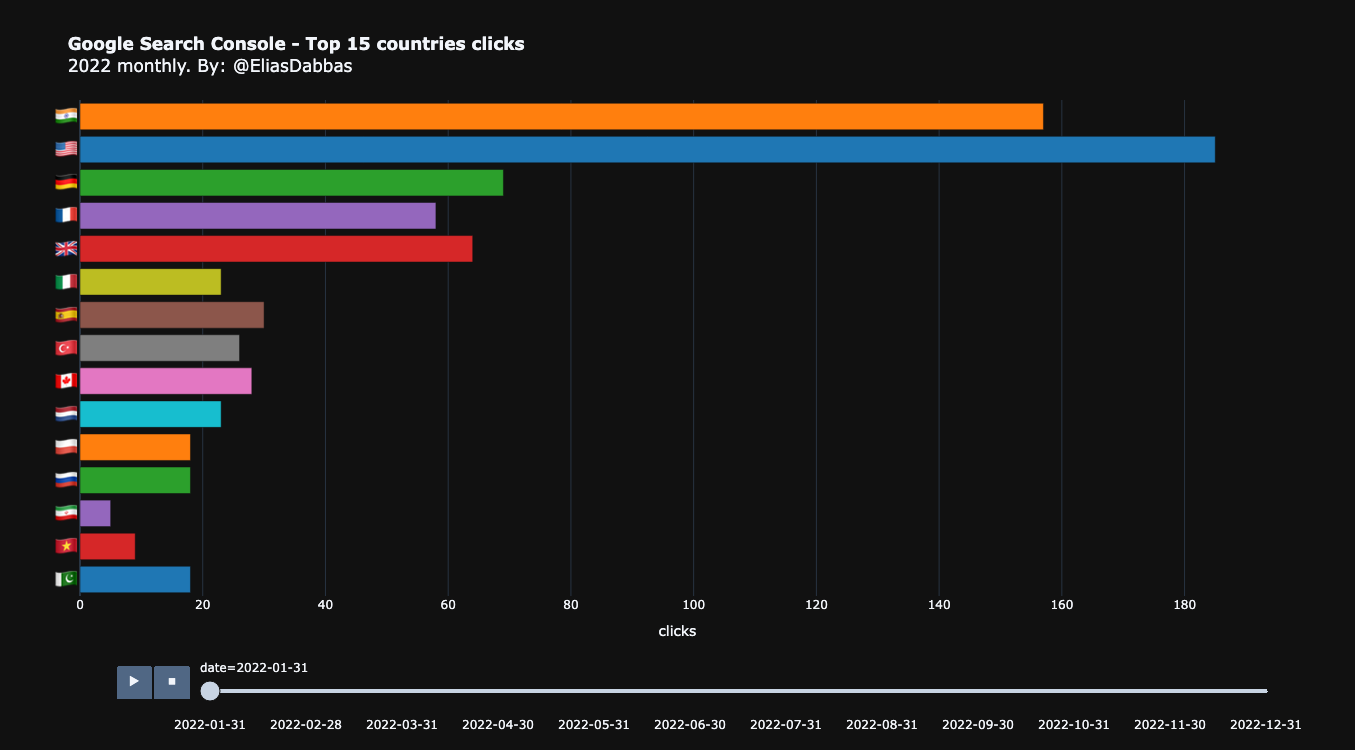

In [ ]:
fig = px.bar(
    country_df[country_df['flag'].isin(top_last_month)],
    x='clicks',
    y='flag',
    animation_frame='date',
    title=f'<b>Google Search Console - Top {n} countries clicks</b><br>2022 monthly. By: <a href="https://twitter.com/eliasdabbas">@EliasDabbas<a>',
    color='flag',
    hover_name='country',
    color_discrete_sequence=px.colors.qualitative.D3,
    template='plotly_dark',
    height=750)

fig.layout.yaxis.categoryarray = top_last_month
fig.layout.yaxis.tickfont.size = 25
fig.layout.yaxis.title = None
fig.layout.showlegend = False
fig

## Write to an HTML file

In [ ]:
fig.write_html('gsc_monthly_top_10_countries_bar_race.html')